<a href="https://colab.research.google.com/github/puraminy/mini_proj3/blob/master/DCGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!git clone https://github.com/eriklindernoren/Keras-GAN

# from google.colab import drive
# drive.mount('/content/gdrive')




In [0]:
import os
save_folder = 'gdrive/My Drive/MiniProj3/images' 

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Training

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(28, 28, 1..., activation=<keras.lay..., strides=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), activation=<keras.lay..., strides=(2, 2), padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation=<keras.lay..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (5, 5), activation="tanh", padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
batch_normalization_1 (Batch (None, 6272)              25088     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.704841, acc.: 46.88%] [G loss: 0.682908]


NameError: ignored

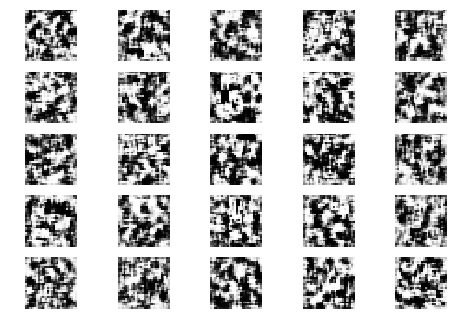

In [1]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

#         model = Sequential()

#         model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
#         model.add(Reshape((7, 7, 128)))
#         model.add(UpSampling2D())
#         model.add(Conv2D(128, kernel_size=3, padding="same"))
#         model.add(BatchNormalization(momentum=0.8))
#         model.add(Activation("relu"))
#         model.add(UpSampling2D())
#         model.add(Conv2D(64, kernel_size=3, padding="same"))
#         model.add(BatchNormalization(momentum=0.8))
#         model.add(Activation("relu"))
#         model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
#         model.add(Activation("tanh"))

#        
        model = Sequential([
                Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)),
                BatchNormalization(),
                Reshape((7,7,128)),
                UpSampling2D(),
                Conv2D(64, 5, 5, border_mode='same', activation=LeakyReLU(0.2)),
                BatchNormalization(),
                UpSampling2D(),
                Conv2D(1, 5, 5, border_mode='same', activation='tanh')
            ])
        model.summary()


        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

#         model = Sequential()

#         model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))
#         model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
#         model.add(ZeroPadding2D(padding=((0,1),(0,1))))
#         model.add(BatchNormalization(momentum=0.8))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))
#         model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
#         model.add(BatchNormalization(momentum=0.8))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))
#         model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
#         model.add(BatchNormalization(momentum=0.8))
#         model.add(LeakyReLU(alpha=0.2))
#         model.add(Dropout(0.25))
#         model.add(Flatten())
#         model.add(Dense(1, activation='sigmoid'))

        model = Sequential([
                Conv2D(64, 5, 5, subsample=(2,2), input_shape=(28,28,1), border_mode='same', activation=LeakyReLU(0.2)),
                Dropout(0.3),
                Conv2D(128, 5, 5, subsample=(2,2), border_mode='same', activation=LeakyReLU(0.2)),
                Dropout(0.3),
                Flatten(),
                Dense(1, activation='sigmoid')
            ])

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        gloss = []
        dloss = []

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss_real[0], 100*d_loss_real[1], g_loss))
            gloss.append(g_loss)
            dloss.append(d_loss)
            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)
                
            return gloss,dloss

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig(save_folder + "/mnist_%d.png" % epoch)
        plt.show()
        plt.close()


if __name__ == '__main__':
    dcgan = DCGAN()
    gloss, dloss = dcgan.train(epochs=1000, batch_size=32, save_interval=50)
